In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# 10.1 Line Plot

# A. Make a dataframe called foot using the "international_football_results.csv" file
#    Perform a few exploratory data analysis operations before working with the data set

# We'll use the .to_datetime method and .dt.year property to set the "year" column from a string to an integer
foot = pd.read_csv('datasets/international_football_results.csv')

In [18]:
foot.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [19]:
foot['date'] = pd.to_datetime(foot['date'])
# foot['date'].year wont work, year is a datetime thing
foot['year'] = foot['date'].dt.year # use dt as accessor

In [20]:
# B. Let's chart how many games occured in each year:
foot.year.value_counts()

year
2008    1087
2011    1077
2004    1059
2000    1022
2001    1014
        ... 
1878       2
1874       1
1873       1
1875       1
1872       1
Name: count, Length: 147, dtype: int64

In [26]:
# The years are out of order! Fortunately, we can sort our column by its index with sort_index()
foot.year.value_counts().sort_index()

year
1872       1
1873       1
1874       1
1875       1
1876       2
        ... 
2014     857
2015    1001
2016     918
2017     908
2018     390
Name: count, Length: 147, dtype: int64

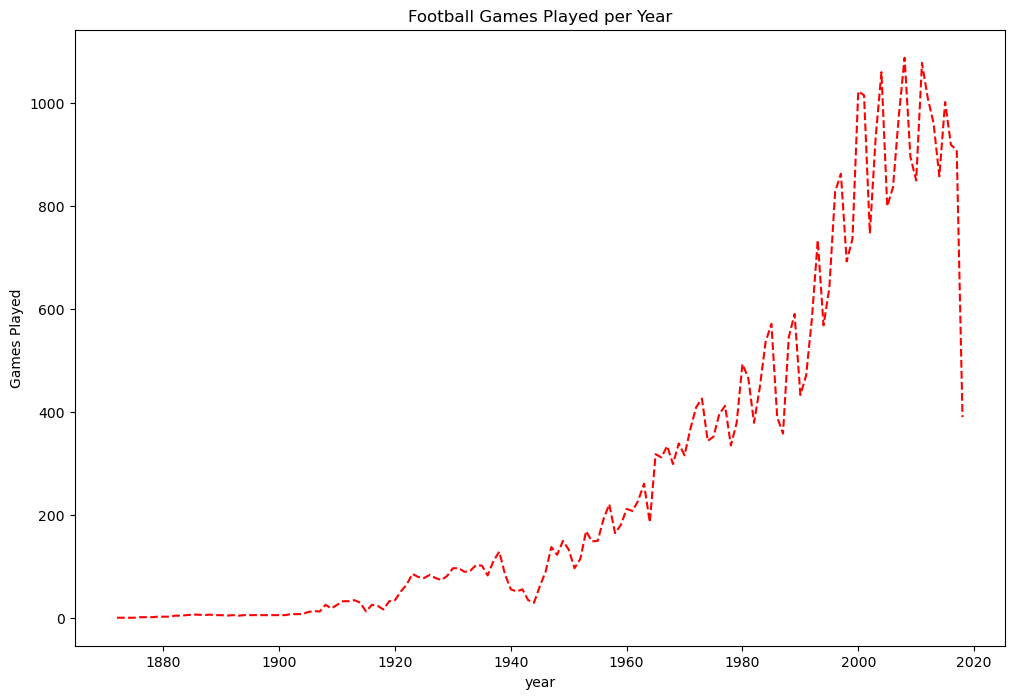

In [28]:
# Finally, we're ready to plot the change over time with .plot()
ax = foot.year.value_counts().sort_index().plot(
    figsize=(12,8),
    ylabel='Games Played',
    style='r--',
    title="Football Games Played per Year"
)

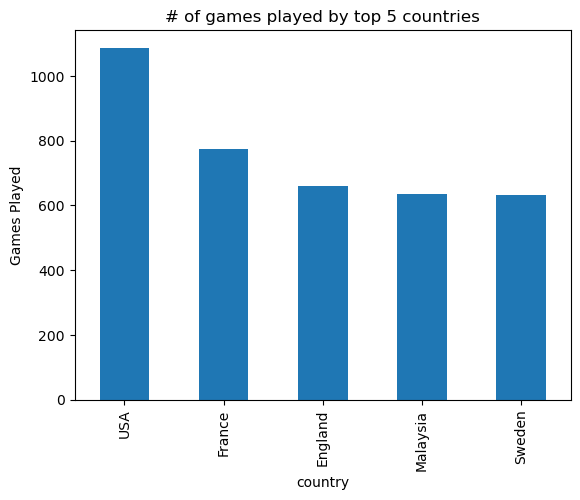

In [29]:
# 10.2 Bar Charts
# A. Let's see how many games the top 5 countries each played, represented as a bar chart
top5 = foot.country.value_counts().head(5).plot(
    kind='bar',
    title='# of games played by top 5 countries',
    ylabel="Games Played"
)

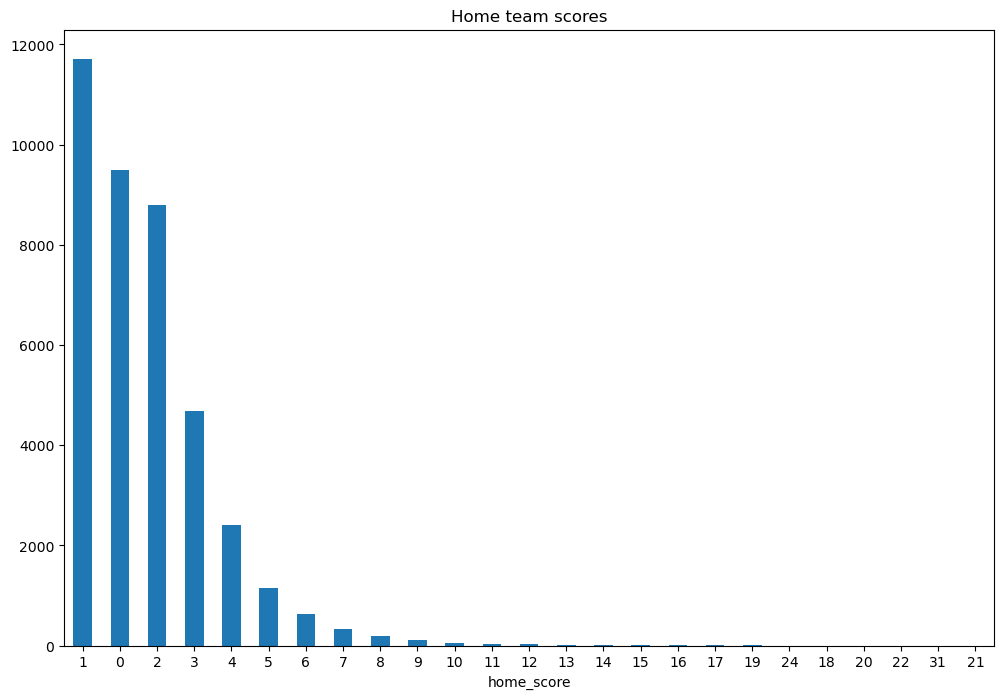

In [30]:
# B. Now let's plot the occurence of specific scores for the home team
homes = foot.home_score.value_counts().plot(
    kind="bar",
    figsize=(12,8),
    rot=0,
    title="Home team scores"
)

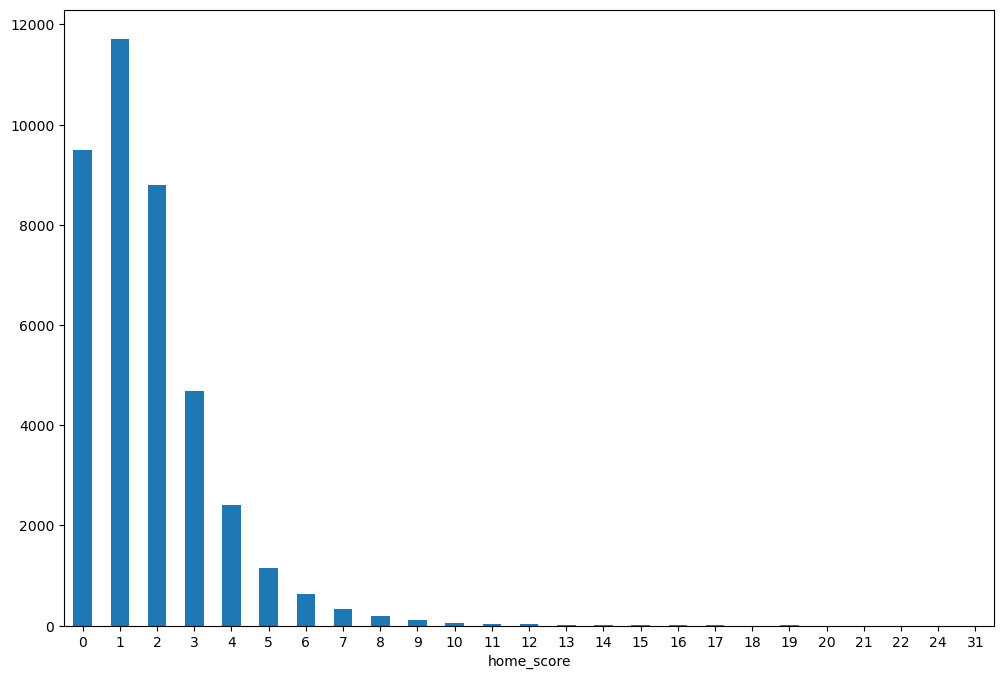

In [32]:
# C. Instead of sorting from highest to lowest value, let's sort the x axis in ascending order
homes = foot.home_score.value_counts().sort_index().plot(
    kind="bar",
    figsize=(12,8),
    rot=0
)

In [34]:
# BONUS: Compare the home_score and away_score value counts to analyze home field advantage
# You will need to use the .apply method to use value_counts on each column of a dataframe
# Only look at 0-9 goals scored


In [4]:
# 10.3 Histograms
# A. Let's start with a new dataset. Create a dataframe called choc from the 'chocolate_ratings.csv' file
#    Inspect the data using some exploratory data analysis methods
choc = pd.read_csv('datasets/chocolate_ratings.csv')
choc.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


<Axes: ylabel='Frequency'>

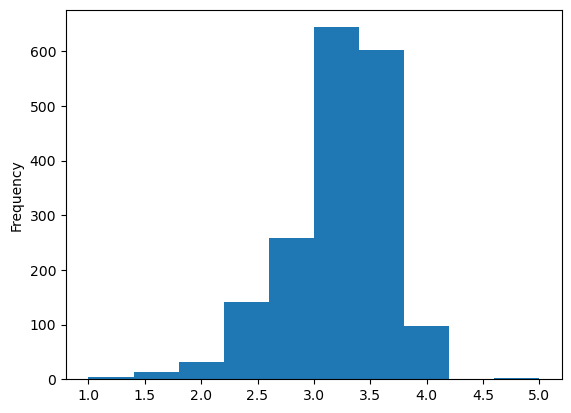

In [38]:
# B. Now, let's explore the distribution of ratings
#    i. Start by plotting the Rating column in a histogram
choc.Rating.plot(
    kind='hist'
)

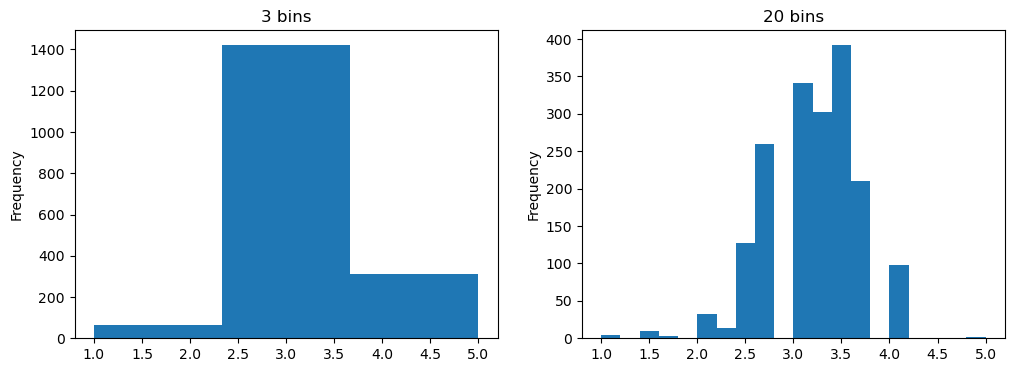

In [41]:
#    ii. Looking good! Let's see how granular we can get
#        Modify the number of bins to change how ranges are distributed
fig, axs = plt.subplots(1, 2, figsize=(12, 4)) #1 row, 2 columns, figsize is a tuple, width x height
choc.Rating.plot(kind='hist', bins=3, title='3 bins', ax=axs[0])
choc.Rating.plot(kind='hist', bins=20, title='20 bins', ax=axs[1]); # semicolon suppresses extra "<Axes:..." output

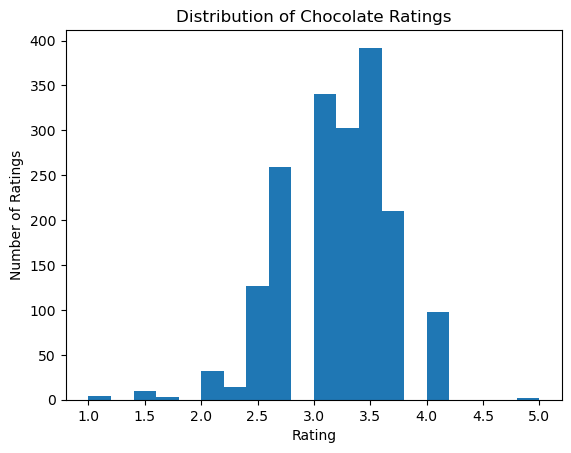

In [43]:
#    iii. Now, let's add some descriptive labels to our chart using matplotlib
choc.Rating.plot(
    kind='hist',
    bins=20,
    ylabel='Number of Ratings',
    xlabel="Rating",
    title="Distribution of Chocolate Ratings"
);

[Text(0.5, 0, 'Rating'),
 Text(0, 0.5, 'Number of Ratings'),
 Text(0.5, 1.0, 'Chocolate Ratings')]

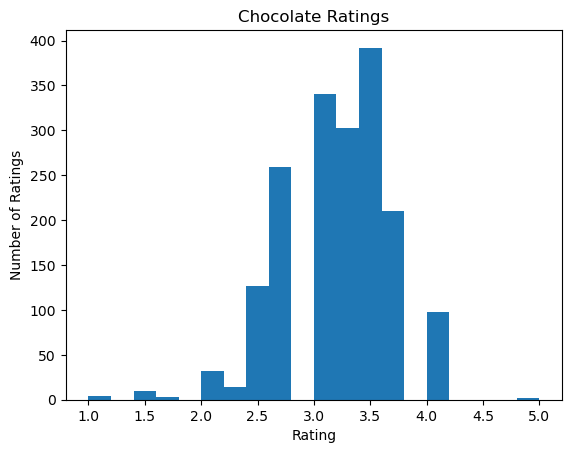

In [44]:
ax = choc.Rating.plot(kind='hist', bins=20)
# ax.set_xlabel() the individuals have more options
# ax.set_ylabel()
# ax.set_title()
ax.set(xlabel='Rating',ylabel='Number of Ratings', title='Chocolate Ratings')

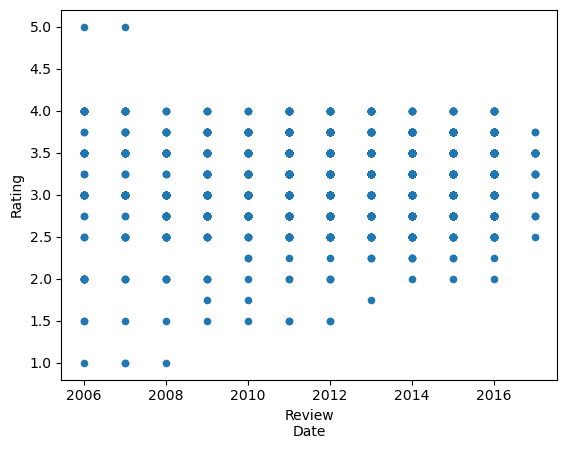

In [46]:
# 10.4 Scatter Plots
# A. Is there a connection between Review Date and Rating? Plot them with a scatter plot
choc.plot(kind='scatter', x='Review\nDate', y='Rating');
# Why is this graph not so helpful?
# Date values by year, and ratings in quarter increments, neither are really continous

In [47]:
# B. Explore the avocado data, then scatter plot correlation between Total Volume and AveragePrice
avo = pd.read_csv('datasets/avocado.csv')
avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


<Axes: xlabel='Total Volume', ylabel='AveragePrice'>

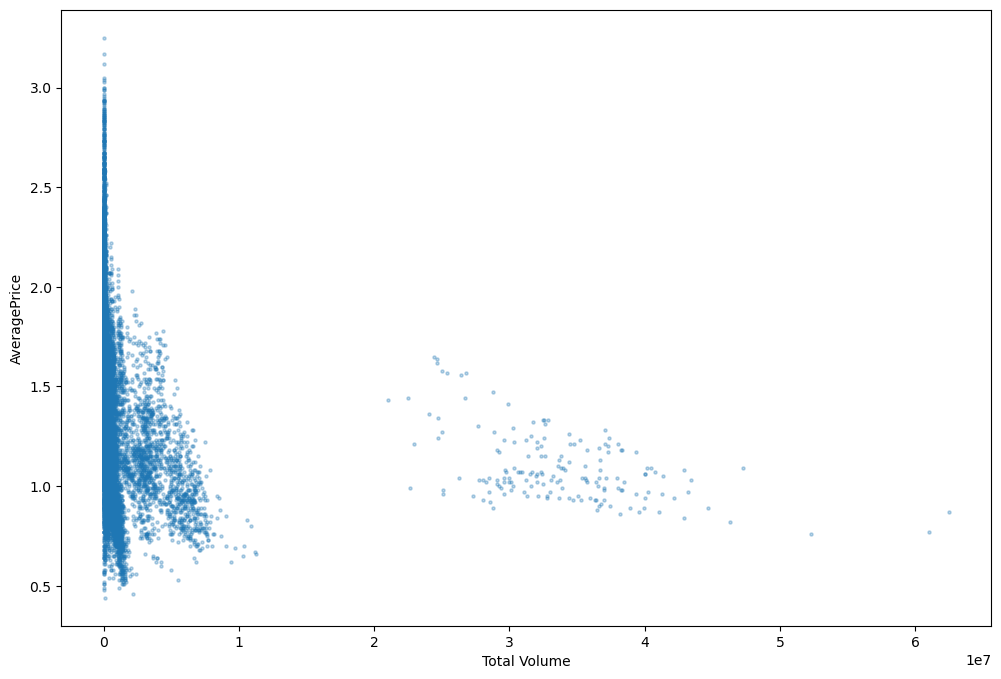

In [49]:
avo.plot(kind='scatter', x='Total Volume', y='AveragePrice', figsize=(12,8), s=5, alpha=.3) # can use size as own variable 

In [51]:
avo['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

<Axes: xlabel='Total Volume', ylabel='AveragePrice'>

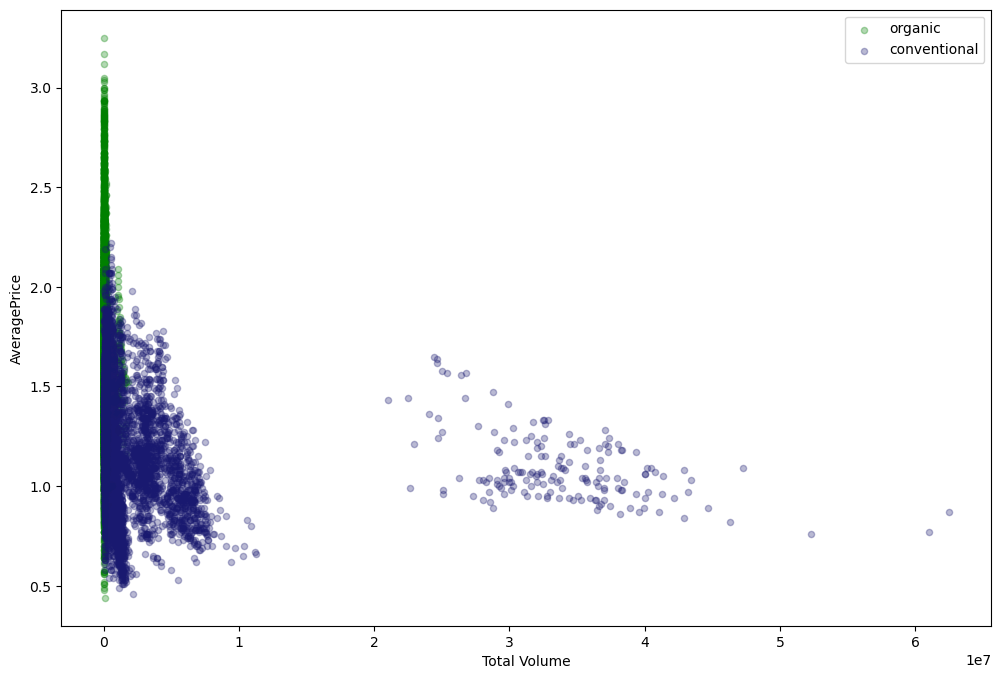

In [54]:
ax = avo[avo.type == 'organic'].plot(kind='scatter', x='Total Volume', y='AveragePrice', c='g', label='organic', alpha=0.3, figsize=(12,8))
avo[avo.type == 'conventional'].plot(kind='scatter', x='Total Volume', y='AveragePrice', c='midnightblue', label='conventional', alpha=0.3, figsize=(12,8), ax=ax)
#used ax=ax to plot both on same chart, recommend not to use too many on same

In [55]:
avo['type_as_num'] = avo['type'].map({'conventional':0, 'organic':1})
avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,type_as_num
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,0


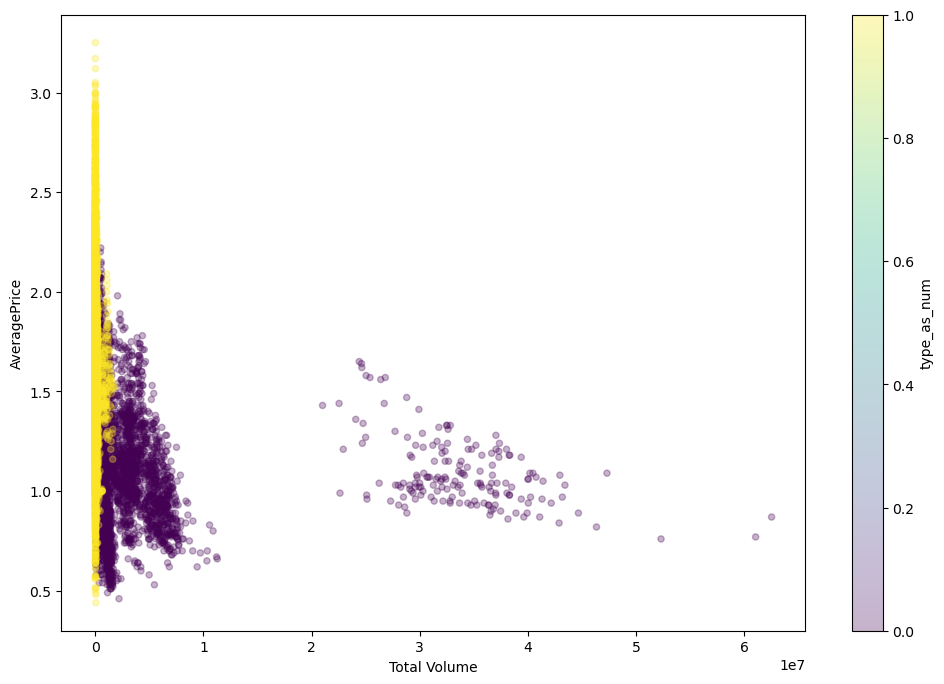

In [58]:
avo.plot(
    kind='scatter',
    x='Total Volume',
    y='AveragePrice',
    figsize=(12,8),
    alpha=.3,
    c='type_as_num',
    cmap='viridis' #this tells it how to associate colors with numbers
);

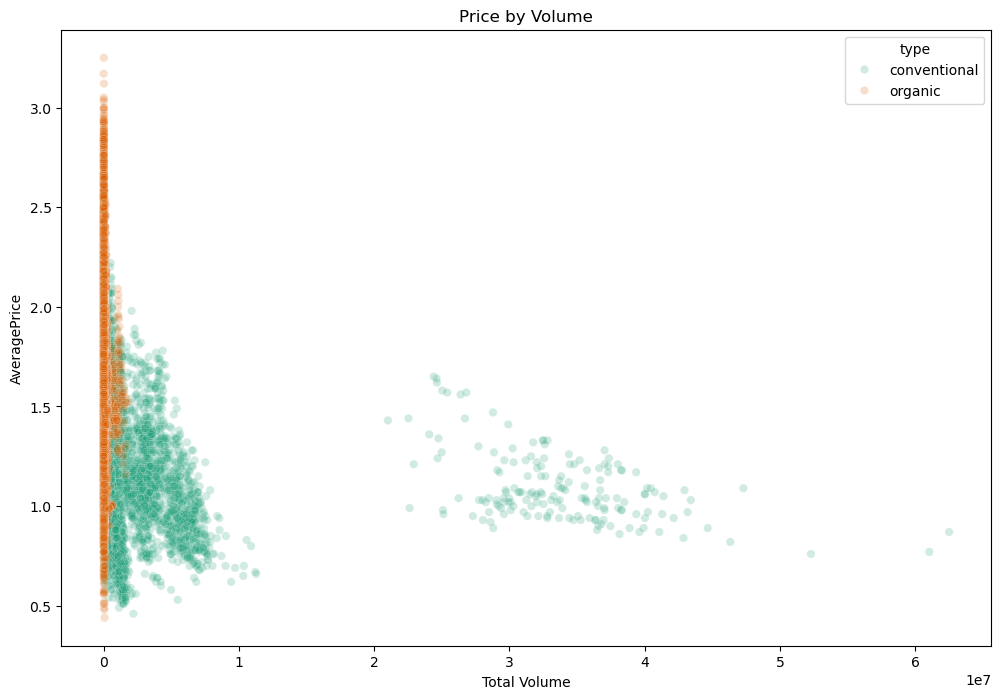

In [59]:
import seaborn as sns

plt.figure(figsize=(12,8))
# sns.heatmap() 
ax = sns.scatterplot(
    data=avo,
    x='Total Volume',
    y='AveragePrice',
    hue='type', # dont have to convert type into a number for seaborn!
    palette='Dark2',
    alpha=0.2
)

# seaborn lacks title, label to be set in function
ax.set_title('Price by Volume')
# can save plot with
plt.savefig('myplot.jpg')

In [21]:
# 10.5 Visualizations to Hypotheses HW
# Create visualizations around any of the above datasets or our superstore datasets
# For at least one of the visualizations, attach a hypothesis or specific claim the chart supports

Text(0.5, 1.0, 'Price by Volume')

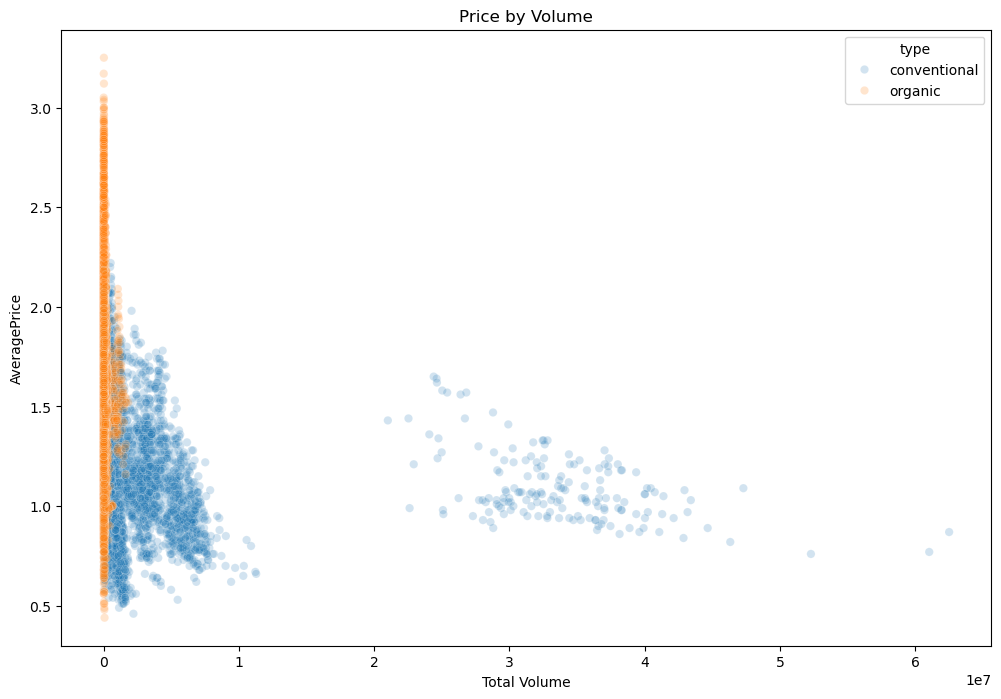

In [25]:
import seaborn as sns

avo = pd.read_csv('datasets/avocado.csv')
plt.figure(figsize=(12,8))
ax = sns.scatterplot(
    data=avo,
    x='Total Volume',
    y='AveragePrice',
    hue='type', # dont have to convert type into a number for seaborn!
    palette='tab10',
    alpha=0.2
)

# Hypothesis that Organic Avacados are the most expensive, even accounting for size
ax.set_title('Price by Volume')